In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score,classification_report

In [2]:
data_dir = "E:\\Machine Learning\\flowers-recognition\\flowers"

In [3]:
train_dir = data_dir + "\\train"
test_dir = data_dir + "\\test"

In [4]:
for folder in os.listdir(train_dir):
    print(folder)

daisy
dandelion
rose
sunflower
tulip


In [5]:
from matplotlib.image import imread

In [6]:
rand_daisy = os.listdir(train_dir+"\\daisy")[random.randint(0,509)] 

In [7]:
rand_daisy

'34300874850_923cc2881c_n.jpg'

In [8]:
rand_daisy = plt.imread(train_dir+"\\daisy\\"+rand_daisy)

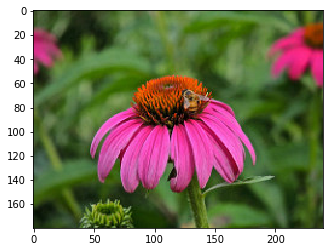

In [9]:
plt.imshow(rand_daisy)

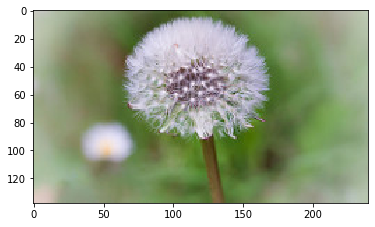

In [10]:
rand_dandelion = os.listdir(train_dir+"\\dandelion")[random.randint(0,509)]
rand_dandelion = plt.imread(train_dir+"\\dandelion\\"+rand_dandelion)
plt.imshow(rand_dandelion)

In [11]:
print(rand_daisy.shape)
print(rand_dandelion.shape)

(180, 240, 3)
(138, 240, 3)


In [12]:
dim1 = []
dim2 = []

for species in os.listdir(train_dir):
    for image_file in os.listdir(train_dir+"\\"+species):
        img = plt.imread(train_dir+"\\"+species+"\\"+image_file)
        d1,d2,colors = img.shape
        dim1.append(d1)
        dim2.append(d2)

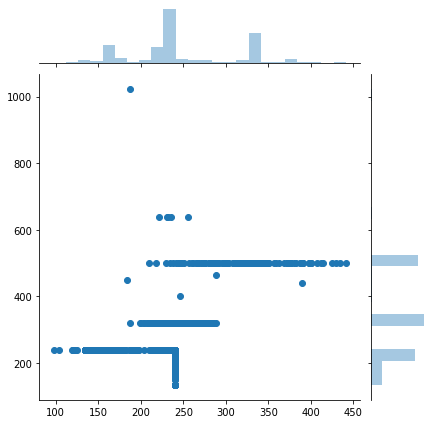

In [13]:
sns.jointplot(dim1,dim2)

In [14]:
np.mean(dim1)

249.25868342705922

In [15]:
np.mean(dim2)

330.9381409196163

In [16]:
image_shape = (250,330,3)

In [17]:
image_gen = ImageDataGenerator(rotation_range = 20,                         
                              width_shift_range=0.1,    
                              height_shift_range=0.1,
                               rescale=1/255,
                              shear_range= 0.1,             
                              zoom_range=0.1,              
                              horizontal_flip=True,        
                               fill_mode = 'nearest')       

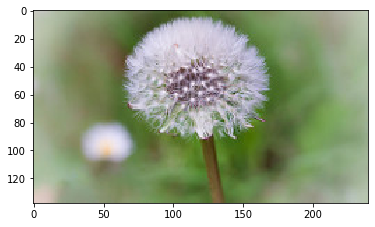

In [18]:
plt.imshow(rand_dandelion)

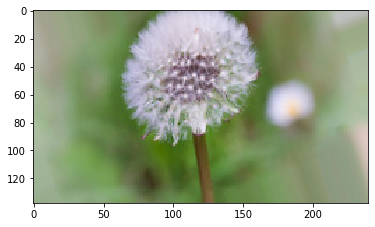

In [19]:
plt.imshow(image_gen.random_transform(rand_dandelion))

In [20]:
image_gen.flow_from_directory(train_dir)

Found 3023 images belonging to 5 classes.


In [21]:
image_gen.flow_from_directory(test_dir)

Found 1300 images belonging to 5 classes.


In [22]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'same',activation ='relu', input_shape = image_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 
model.add(Conv2D(filters =64, kernel_size = (3,3),padding = 'same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())

model.add(Dense(512,activation='relu'))

model.add(Dense(5, activation = "softmax"))

In [23]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 250, 330, 16)      1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 165, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 165, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 82, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 82, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 41, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 31, 41, 128)       7

In [25]:
batch_size = 16

In [26]:
train_image_gen = image_gen.flow_from_directory(train_dir,target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 3023 images belonging to 5 classes.


In [27]:
test_image_gen = image_gen.flow_from_directory(test_dir,target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                              shuffle=False)

Found 1300 images belonging to 5 classes.


In [28]:
train_image_gen.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [29]:
stop = EarlyStopping(patience = 3, monitor = 'val_loss')

In [30]:
results = model.fit_generator(train_image_gen,
                             epochs=100,
                             validation_data=test_image_gen,
                             callbacks = [stop])

Epoch 1/100
189/189 [==============================] - 69s 364ms/step - loss: 1.3805 - accuracy: 0.3976 - val_loss: 1.3248 - val_accuracy: 0.3738
Epoch 2/100
189/189 [==============================] - 69s 367ms/step - loss: 1.2883 - accuracy: 0.4542 - val_loss: 1.2757 - val_accuracy: 0.4054
Epoch 3/100
189/189 [==============================] - 72s 380ms/step - loss: 1.2212 - accuracy: 0.4942 - val_loss: 1.2630 - val_accuracy: 0.4354
Epoch 4/100
189/189 [==============================] - 74s 391ms/step - loss: 1.1553 - accuracy: 0.5240 - val_loss: 1.1083 - val_accuracy: 0.5469
Epoch 5/100
189/189 [==============================] - 75s 398ms/step - loss: 1.0893 - accuracy: 0.5680 - val_loss: 1.2012 - val_accuracy: 0.4946
Epoch 6/100
189/189 [==============================] - 76s 401ms/step - loss: 1.0030 - accuracy: 0.6143 - val_loss: 0.9898 - val_accuracy: 0.6131
Epoch 7/100
189/189 [==============================] - 76s 404ms/step - loss: 0.9578 - accuracy: 0.6348 - val_loss: 1.1102 -

In [31]:
history = pd.DataFrame(model.history.history)

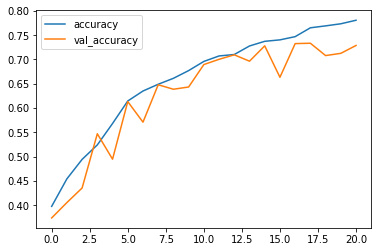

In [32]:
history[['accuracy','val_accuracy']].plot()

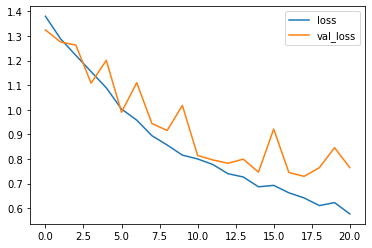

In [33]:
history[['loss','val_loss']].plot()

In [34]:
model.save('flower.h5')

In [35]:
pred_prob = model.predict_generator(test_image_gen)

In [36]:
pred_prob

array([[7.1834095e-02, 6.9958735e-01, 5.9355143e-02, 1.9089218e-02,
        1.5013421e-01],
       [4.3326360e-01, 2.0502345e-01, 1.1581763e-01, 2.2867819e-02,
        2.2302750e-01],
       [7.3120125e-02, 2.5740498e-01, 3.7747002e-01, 2.4877550e-02,
        2.6712731e-01],
       ...,
       [2.3100623e-03, 6.4910803e-04, 2.1708994e-01, 2.5790188e-04,
        7.7969301e-01],
       [6.6589609e-02, 1.7320270e-02, 6.9494623e-01, 4.1012326e-04,
        2.2073372e-01],
       [5.7907157e-05, 3.8971029e-06, 2.5870418e-03, 1.3301806e-06,
        9.9734986e-01]], dtype=float32)

In [37]:
preds = pred_prob.argmax(axis=-1) 

In [38]:
preds

array([1, 0, 2, ..., 4, 2, 4], dtype=int64)

In [39]:
print(test_image_gen.classes)

[0 0 0 ... 4 4 4]


In [40]:
print(classification_report(test_image_gen.classes,preds))

              precision    recall  f1-score   support

           0       0.92      0.70      0.80       260
           1       0.72      0.78      0.75       260
           2       0.75      0.44      0.55       260
           3       0.77      0.88      0.82       260
           4       0.57      0.82      0.67       260

    accuracy                           0.72      1300
   macro avg       0.75      0.72      0.72      1300
weighted avg       0.75      0.72      0.72      1300



In [41]:
print(accuracy_score(test_image_gen.classes,preds))

0.7230769230769231
